In [124]:
using Gadfly
using Colors
using Compose

In [33]:
n=Array{Float64}(2,3);
n[:,1]=[cos(π/3),sin(π/3)];
n[:,2]=[-cos(π/3),sin(π/3)];
n[:,3]=[0,-1];

In [249]:
base03=parse(Colorant,"#002b36");
base02=parse(Colorant,"#073642");
base01=parse(Colorant,"#586e75");
base00=parse(Colorant,"#657b83");
base0=parse(Colorant,"#839496");
base1=parse(Colorant,"#839496");
base2=parse(Colorant,"#eee8d5");
base3=parse(Colorant,"#fdf6e3");

yellow=parse(Colorant,"#b58900");
orange=parse(Colorant,"#cb4b16");
red=parse(Colorant,"#dc322f");
magenta=parse(Colorant,"#d33682");
violet=parse(Colorant,"#6c71c4");
blue=parse(Colorant,"#268bd2");
cyan=parse(Colorant,"#3aa198");
green=parse(Colorant,"#859900");
sc=Scale.ContinuousColorScale(Scale.lab_gradient(red,magenta,
violet,blue,cyan,green));
sc2=Scale.ContinuousColorScale(Scale.lab_gradient(blue,violet,magenta,red,orange,
yellow,green,cyan));

t=Theme(highlight_width=0pt,default_point_size=3pt,#background_color=base03,
    grid_color=base2,minor_label_color=base2,key_label_color=base2,
key_title_color=cyan,major_label_color=cyan,
grid_line_width=0pt,panel_opacity=0);
lpx=Guide.xlabel("X Momentum");
lpy=Guide.ylabel("Y Momentum");

In [34]:
function f(kx,ky,Jx,Jy,Jz)
    akx=sqrt(3)*kx/2;
    bky=3*ky/2;
    
    ei=Jx^2+Jy^2+Jz^2
    ei+=2*Jx*Jy*cos(akx*2)
    ei+=2*Jy*Jz*cos(akx-bky)
    ei+=2*Jx*Jz*cos(akx+bky)
    return ei
end

function fprime(kx,ky,Jx,Jy,Jz)
    a=sqrt(3)/2;
    b=3/2;
    akx=a*kx;
    bky=b*ky;
    
    ex=-4*a*Jx*Jy*sin(akx*2);
    ex+=-2*a*Jy*Jz*sin(akx-bky);
    ex+=-2*a*Jx*Jz*sin(akx+bky);
    
    ey=2*b*Jy*Jz*sin(akx-bky);
    ey+=-2*b*Jx*Jz*sin(akx+bky);
    
    return ex, ey 
end

fprime (generic function with 1 method)

In [277]:
Jx=collect(.01:.01:1);
Jy=collect(.01:.01:1);
Jxa=repeat(Jx,outer=[1,length(Jy)]);
Jya=repeat(transpose(Jy),outer=[length(Jx),1]);

kx=collect(0:.05:(π));
ky=collect(0:.05:(π));
kxa=repeat(kx,outer=[1,length(ky)]);
fi=zeros(kxa)

val=zeros(Float64,length(Jx),length(Jy));

for jxi in 1:length(Jx)
    for jyi in 1:length(Jy)
        
        
        for kxi in 1:length(kx)
            for kyi in 1:length(ky)
                fi[kxi,kyi]=f(kx[kxi],ky[kyi],Jx[jxi],Jy[jyi],1);
            end
        end
        val[jxi,jyi]=minimum(fi)
        #println(Jx[jxi]," ",Jy[jyi]," ",minimum(fi))
        
    end
end

        

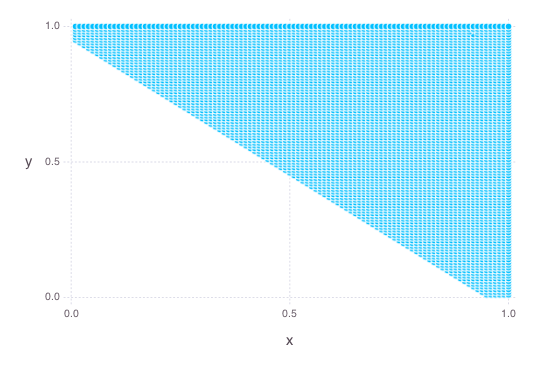

In [220]:
ind=find(x->x<2e-3,val)
plot(x=Jxa[ind],y=Jya[ind])

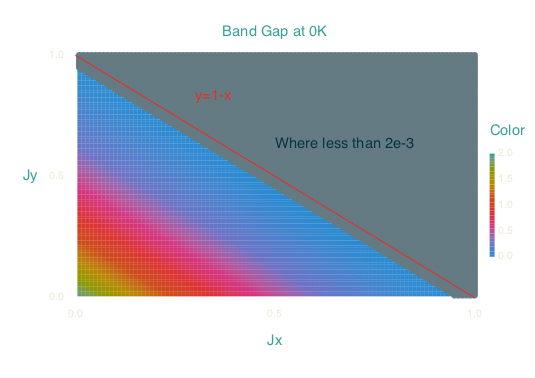

In [280]:
tiny=layer(x=Jxa[ind],y=Jya[ind],Geom.point,Theme(default_color=base00,highlight_width=0pt))

ln=layer(x->(1-x),0,1,Theme(default_color=red))

textbandgap=Guide.annotation(compose(context(),
text(.5,.6,"Where less than 2e-3"),stroke(nothing),fill(base02),linewidth(2pt)
        ));

textline=Guide.annotation(compose(context(),
text(.3,.8,"y=1-x"),stroke(nothing),fill(red),linewidth(2pt)
        ));


p=plot(ln,tiny,textbandgap,textline,x=Jxa,y=Jya,color=2*val,Geom.rectbin,sc2,t
,Guide.xlabel("Jx"),Guide.ylabel("Jy"),Guide.title("Band Gap at 0K")
,Coord.Cartesian(xmin=0,xmax=1,ymin=0,ymax=1))
#draw(SVG("PhaseDiagram.svg",6inch,6inch),p)

In [274]:
kx=collect((-π):.05:(π));
ky=collect((-π):.05:(π));
kxa=repeat(kx,outer=[1,length(ky)]);
kya=repeat(transpose(ky),outer=[length(kx),1]);
fi=zeros(kxa)


for kxi in 1:length(kx)
    for kyi in 1:length(ky)
        fi[kxi,kyi]=f(kx[kxi],ky[kyi],1,.5,.1);
    end
end
minimum(fi)


#i=find(x->x<3e-3,fi)
#plot(x=kxa[i],y=kya[i],Geom.point,t)
val,i=findmin(fi)

(0.16003528264804723,10684)

In [279]:
valwrite=round(val,2)
text1=Guide.annotation(compose(context(),
text(-kxa[i]+.2,-kya[i],"Minimum of $valwrite"),stroke(nothing),fill(base03),linewidth(2pt)
        ));
point1=Guide.annotation(compose(context(),
circle(-kxa[i],-kya[i],.1),stroke(base03),fill(nothing)
));

l1=layer(x=kxa,y=kya,color=fi, Geom.rectbin, t)
#l2=layer(x=kxa[i],y=kya[i],Geom.point,t)
p=plot(text1,point1,l1,Coord.Cartesian(ymin=-pi,ymax=pi,xmin=-pi,xmax=pi),sc,
lpx,lpy,Guide.title("Dispersion Relationship for [1,.5,.1]"),t)
#draw(SVG("Analytic_1p5p1.svg",6inch,6inch),p)

LoadError: LoadError: BoundsError: attempt to access 63x63 Array{Float64,2}:
 0.0   0.0   0.0   0.0   0.0   0.0   …  0.0   0.0   0.0   0.0   0.0   0.0 
 0.05  0.05  0.05  0.05  0.05  0.05     0.05  0.05  0.05  0.05  0.05  0.05
 0.1   0.1   0.1   0.1   0.1   0.1      0.1   0.1   0.1   0.1   0.1   0.1 
 0.15  0.15  0.15  0.15  0.15  0.15     0.15  0.15  0.15  0.15  0.15  0.15
 0.2   0.2   0.2   0.2   0.2   0.2      0.2   0.2   0.2   0.2   0.2   0.2 
 0.25  0.25  0.25  0.25  0.25  0.25  …  0.25  0.25  0.25  0.25  0.25  0.25
 0.3   0.3   0.3   0.3   0.3   0.3      0.3   0.3   0.3   0.3   0.3   0.3 
 0.35  0.35  0.35  0.35  0.35  0.35     0.35  0.35  0.35  0.35  0.35  0.35
 0.4   0.4   0.4   0.4   0.4   0.4      0.4   0.4   0.4   0.4   0.4   0.4 
 0.45  0.45  0.45  0.45  0.45  0.45     0.45  0.45  0.45  0.45  0.45  0.45
 0.5   0.5   0.5   0.5   0.5   0.5   …  0.5   0.5   0.5   0.5   0.5   0.5 
 0.55  0.55  0.55  0.55  0.55  0.55     0.55  0.55  0.55  0.55  0.55  0.55
 0.6   0.6   0.6   0.6   0.6   0.6      0.6   0.6   0.6   0.6   0.6   0.6 
 ⋮                             ⋮     ⋱                    ⋮               
 2.55  2.55  2.55  2.55  2.55  2.55     2.55  2.55  2.55  2.55  2.55  2.55
 2.6   2.6   2.6   2.6   2.6   2.6      2.6   2.6   2.6   2.6   2.6   2.6 
 2.65  2.65  2.65  2.65  2.65  2.65     2.65  2.65  2.65  2.65  2.65  2.65
 2.7   2.7   2.7   2.7   2.7   2.7      2.7   2.7   2.7   2.7   2.7   2.7 
 2.75  2.75  2.75  2.75  2.75  2.75  …  2.75  2.75  2.75  2.75  2.75  2.75
 2.8   2.8   2.8   2.8   2.8   2.8      2.8   2.8   2.8   2.8   2.8   2.8 
 2.85  2.85  2.85  2.85  2.85  2.85     2.85  2.85  2.85  2.85  2.85  2.85
 2.9   2.9   2.9   2.9   2.9   2.9      2.9   2.9   2.9   2.9   2.9   2.9 
 2.95  2.95  2.95  2.95  2.95  2.95     2.95  2.95  2.95  2.95  2.95  2.95
 3.0   3.0   3.0   3.0   3.0   3.0   …  3.0   3.0   3.0   3.0   3.0   3.0 
 3.05  3.05  3.05  3.05  3.05  3.05     3.05  3.05  3.05  3.05  3.05  3.05
 3.1   3.1   3.1   3.1   3.1   3.1      3.1   3.1   3.1   3.1   3.1   3.1 
  at index [10684]
while loading In[279], in expression starting on line 2